### LSTM Model

In [10]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

- Load and preprocess the dataset: Clean the data, normalize the features, and split it into training and testing sets.
- Create the LSTM model: Define the architecture of the LSTM model.
- Train the model: Train the LSTM model using the training data and plot the learning curves.
- Evaluate the model: Evaluate the model using the test data and compute evaluation metrics.
- Plot the model performance: Visualize the performance of the model with appropriate plots.

In [21]:
data_url = "https://raw.githubusercontent.com/rashida048/Datasets/master/stock_data.csv"
# Load dataset
df = pd.read_csv(data_url)
df

,Date,Open,High,Low,Close,Volume,Name
0,1/3/2006,39.69,41.22,38.79,40.91,24232729,AABA
1,1/4/2006,41.22,41.90,40.77,40.97,20553479,AABA
2,1/5/2006,40.93,41.73,40.85,41.53,12829610,AABA
3,1/6/2006,42.88,43.57,42.80,43.21,29422828,AABA
4,1/9/2006,43.10,43.66,42.82,43.42,16268338,AABA
...,...,...,...,...,...,...,...
3014,12/22/2017,71.42,71.87,71.22,71.58,10979165,AABA
3015,12/26/2017,70.94,71.39,69.63,69.86,8542802,AABA
3016,12/27/2017,69.77,70.49,69.69,70.06,6345124,AABA
3017,12/28/2017,70.12,70.32,69.51,69.82,7556877,AABA


In [22]:
# Preprocessing
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
data = df[['Close']].values

In [23]:
# Normalize the dataset
scaler = MinMaxScaler(feature_range=(0, 1))
scaled_data = scaler.fit_transform(data)

# Split into training and test sets
train_size = int(len(scaled_data) * 0.8)
test_size = len(scaled_data) - train_size
train, test = scaled_data[0:train_size, :], scaled_data[train_size:len(scaled_data), :]

# Convert an array of values into a dataset matrix
def create_dataset(dataset, time_step=1):
    dataX, dataY = [], []
    for i in range(len(dataset) - time_step - 1):
        a = dataset[i:(i + time_step), 0]
        dataX.append(a)
        dataY.append(dataset[i + time_step, 0])
    return np.array(dataX), np.array(dataY)

time_step = 60
X_train, y_train = create_dataset(train, time_step)
X_test, y_test = create_dataset(test, time_step)

# Reshape input to be [samples, time steps, features] which is required for LSTM
X_train = X_train.reshape(X_train.shape[0], X_train.shape[1], 1)
X_test = X_test.reshape(X_test.shape[0], X_test.shape[1], 1)

In [24]:
# Create the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(time_step, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

# Compile the model
model.compile(optimizer='adam', loss='mean_squared_error')

# Summary of the model
model.summary()

C:\Users\farenrai\Desktop\mlworkspace\.pymlvenv\lib\site-packages\keras\src\layers\rnn\rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ lstm_2 (LSTM)                        │ (None, 60, 50)              │          10,400 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ lstm_3 (LSTM)                        │ (None, 50)                  │          20,200 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 25)                  │           1,275 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 1)                   │              26 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 31,901 (124.61 KB)

 Trainable params: 31,901 (124.61 KB)

 Non-trainable params: 0 (0.00 B)

2354/2354 ━━━━━━━━━━━━━━━━━━━━ 33s 14ms/step - loss: 0.0016 - val_loss: 3.7114e-04


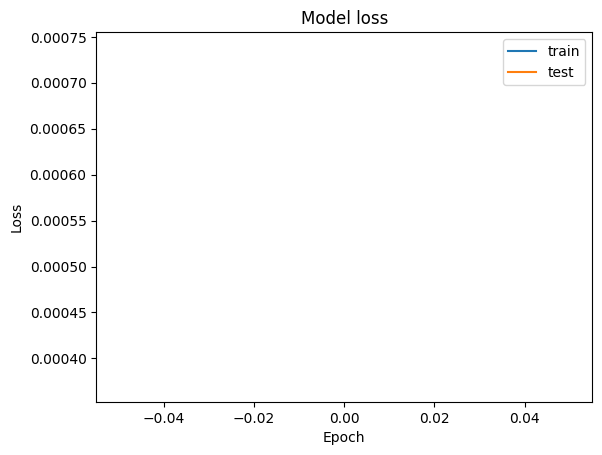

In [25]:
# Train the model
history = model.fit(X_train, y_train, batch_size=1, epochs=1, validation_data=(X_test, y_test))

# Plot the learning curves
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(loc='upper right')
plt.show()

In [26]:
# Make predictions
train_predict = model.predict(X_train)
test_predict = model.predict(X_test)

# Inverse transform the predictions
train_predict = scaler.inverse_transform(train_predict)
test_predict = scaler.inverse_transform(test_predict)

# Inverse transform the actual values
y_train_actual = scaler.inverse_transform([y_train])
y_test_actual = scaler.inverse_transform([y_test])

# Calculate RMSE
train_rmse = np.sqrt(mean_squared_error(y_train_actual[0], train_predict[:,0]))
test_rmse = np.sqrt(mean_squared_error(y_test_actual[0], test_predict[:,0]))
print(f'Train RMSE: {train_rmse}')
print(f'Test RMSE: {test_rmse}')

74/74 ━━━━━━━━━━━━━━━━━━━━ 1s 11ms/step
17/17 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step
Train RMSE: 1.0461502032872456
Test RMSE: 1.2325770316973168


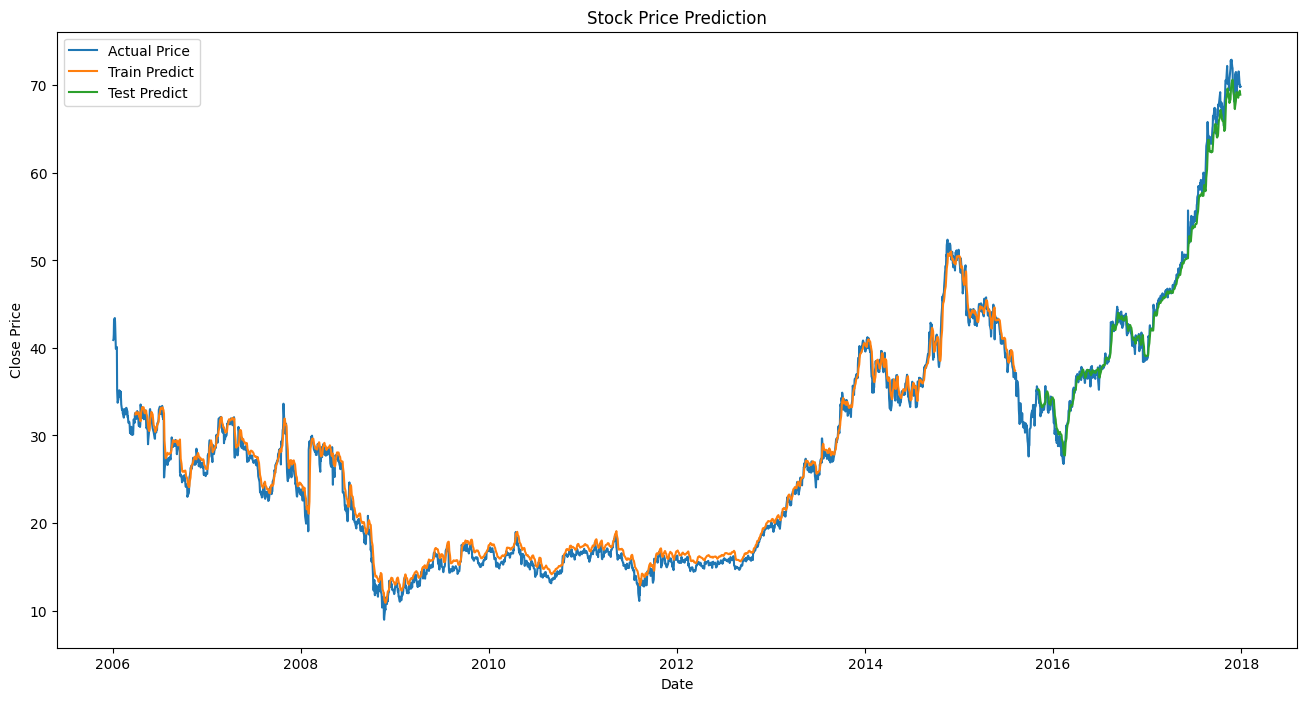

In [27]:
# Plotting the actual vs predicted prices
train_data = data[:train_size]
test_data = data[train_size:]

train_data_pred = np.empty_like(data)
train_data_pred[:, :] = np.nan
train_data_pred[time_step:len(train_predict) + time_step, :] = train_predict

test_data_pred = np.empty_like(data)
test_data_pred[:, :] = np.nan
test_data_pred[len(train_predict) + (time_step * 2) + 1:len(data) - 1, :] = test_predict

# Plot baseline and predictions
plt.figure(figsize=(16, 8))
plt.plot(df['Close'], label='Actual Price')
plt.plot(pd.DataFrame(train_data_pred, index=df.index, columns=['Close']), label='Train Predict')
plt.plot(pd.DataFrame(test_data_pred, index=df.index, columns=['Close']), label='Test Predict')
plt.title('Stock Price Prediction')
plt.xlabel('Date')
plt.ylabel('Close Price')
plt.legend(loc='best')
plt.show()